In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import netCDF4 as nc
from sklearn.linear_model import LinearRegression
import datetime 

2024-05-29 11:38:19.201592: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 11:38:19.421736: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 11:38:19.421770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 11:38:19.457302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 11:38:19.536749: I tensorflow/core/platform/cpu_feature_guar

In [2]:
#check if GPU is available
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-05-18 11:11:07.900393: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 11:11:08.028324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 11:11:08.028374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [9]:

data = {
    year: {
            "climate": nc.Dataset("data/main/" + year + "/climate.nc"),
            "polution": nc.Dataset("data/main/" + year + "/polution.nc"),
        }
    for year in ["2021", "2022", "2023"]
}

In [12]:
data["2021"]["polution"].variables["longitude"][:]

masked_array(data=[30.45, 30.55, 30.65, 30.75, 30.85, 30.95, 31.05, 31.15,
                   31.25, 31.35, 31.45, 31.55, 31.65, 31.75, 31.85, 31.95,
                   32.05, 32.15, 32.25, 32.35, 32.45, 32.55, 32.65, 32.75,
                   32.85, 32.95, 33.05, 33.15, 33.25, 33.35, 33.45, 33.55,
                   33.65, 33.75, 33.85, 33.95, 34.05, 34.15, 34.25, 34.35,
                   34.45, 34.55, 34.65, 34.75, 34.85, 34.95, 35.05, 35.15,
                   35.25, 35.35, 35.45, 35.55, 35.65, 35.75, 35.85, 35.95,
                   36.05, 36.15, 36.25, 36.35, 36.45, 36.55, 36.65, 36.75,
                   36.85, 36.95, 37.05, 37.15, 37.25, 37.35, 37.45, 37.55,
                   37.65, 37.75, 37.85, 37.95, 38.05, 38.15, 38.25, 38.35,
                   38.45, 38.55, 38.65, 38.75, 38.85, 38.95, 39.05, 39.15,
                   39.25, 39.35, 39.45, 39.55, 39.65, 39.75, 39.85, 39.95,
                   40.05, 40.15, 40.25],
             mask=False,
       fill_value=1e+20,
         

In [16]:
data["2021"]["climate"].variables['lon'][:]

masked_array(data=[30.75, 31.25, 31.75, 32.25, 32.75, 33.25, 33.75, 34.25,
                   34.75, 35.25, 35.75, 36.25, 36.75, 37.25, 37.75, 38.25,
                   38.75, 39.25, 39.75, 40.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [30]:
data["2021"]["polution"].variables["latitude"][: :-1]

masked_array(data=[44.25, 44.35, 44.45, 44.55, 44.65, 44.75, 44.85, 44.95,
                   45.05, 45.15, 45.25, 45.35, 45.45, 45.55, 45.65, 45.75,
                   45.85, 45.95, 46.05, 46.15, 46.25, 46.35, 46.45, 46.55,
                   46.65, 46.75, 46.85, 46.95, 47.05, 47.15, 47.25, 47.35,
                   47.45, 47.55, 47.65, 47.75, 47.85, 47.95, 48.05, 48.15,
                   48.25, 48.35, 48.45, 48.55, 48.65, 48.75, 48.85, 48.95,
                   49.05, 49.15, 49.25, 49.35, 49.45, 49.55, 49.65, 49.75,
                   49.85, 49.95, 50.05, 50.15, 50.25, 50.35, 50.45, 50.55,
                   50.65, 50.75, 50.85, 50.95, 51.05, 51.15, 51.25, 51.35,
                   51.45, 51.55, 51.65, 51.75, 51.85, 51.95, 52.05, 52.15,
                   52.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [15]:
data["2021"]["climate"].variables['lat'][:]

masked_array(data=[44.25, 44.75, 45.25, 45.75, 46.25, 46.75, 47.25, 47.75,
                   48.25, 48.75, 49.25, 49.75, 50.25, 50.75, 51.25, 51.75,
                   52.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [32]:
data["2021"]["polution"].variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 'co_conc', 'no2_conc', 'no_conc', 'o3_conc', 'pm10_conc', 'pm2p5_conc', 'so2_conc'])

In [160]:
start_date = datetime.date(2021, 1, 1); end_date = datetime.date(2023, 12, 31)
time = [start_date + datetime.timedelta(days=i) for i in range((end_date - start_date).days + 1)]

co_conc = np.array(data["2021"]["polution"].variables["co_conc"][:, 0, 0, -1])
no2_conc = np.array(data["2021"]["polution"].variables["no2_conc"][:, 0, 0, -1])
no_conc = np.array(data["2021"]["polution"].variables["no_conc"][:, 0, 0, -1])
o3_conc = np.array(data["2021"]["polution"].variables["o3_conc"][:, 0, 0, -1])
pm10_conc = np.array(data["2021"]["polution"].variables["pm10_conc"][:, 0, 0, -1])
pm2p5_conc = np.array(data["2021"]["polution"].variables["pm2p5_conc"][:, 0, 0, -1])
so2_conc = np.array(data["2021"]["polution"].variables["so2_conc"][:, 0, 0, -1])
    
for year in ["2022", "2023"]:
    co_conc = np.append(co_conc, np.array(data[year]["polution"].variables["co_conc"][:, 0, 0, -1]))
    no2_conc = np.append(no2_conc, np.array(data[year]["polution"].variables["no2_conc"][:, 0, 0, -1]))
    no_conc = np.append(no_conc, np.array(data[year]["polution"].variables["no_conc"][:, 0, 0, -1]))
    o3_conc = np.append(o3_conc, np.array(data[year]["polution"].variables["o3_conc"][:, 0, 0, -1]))
    pm10_conc = np.append(pm10_conc, np.array(data[year]["polution"].variables["pm10_conc"][:, 0, 0, -1]))
    pm2p5_conc = np.append(pm2p5_conc, np.array(data[year]["polution"].variables["pm2p5_conc"][:, 0, 0, -1]))
    so2_conc = np.append(so2_conc,  np.array(data[year]["polution"].variables["so2_conc"][:, 0, 0, -1]))
pd.DataFrame({
    "time": time,
    "co_conc": co_conc,
    "no2_conc": no2_conc,
    "no_conc": no_conc,
    "o3_conc": o3_conc,
    "pm10_conc": pm10_conc,
    "pm2p5_conc": pm2p5_conc,
    "so2_conc": so2_conc
})

,time,co_conc,no2_conc,no_conc,o3_conc,pm10_conc,pm2p5_conc,so2_conc
0,2021-01-01,170.168808,1.028445,0.040401,53.246178,6.369783,5.719595,0.539046
1,2021-01-02,220.999222,5.842485,0.193722,37.741005,8.818721,8.611152,1.407898
2,2021-01-03,227.494476,3.127383,0.126995,48.691513,18.563221,14.773418,1.433477
3,2021-01-04,190.695343,1.226944,0.049113,58.267048,8.776794,7.689550,0.759940
4,2021-01-05,148.188797,1.030613,0.044245,68.930183,4.086234,3.182879,0.491710
...,...,...,...,...,...,...,...,...
1090,2023-12-27,169.066650,1.973635,0.089216,56.505196,2.719846,2.470642,0.598573
1091,2023-12-28,193.595978,2.935729,0.263832,55.377506,6.573823,5.748918,1.993840
1092,2023-12-29,201.386597,2.816414,0.199975,43.828003,13.946591,11.377452,1.526470
1093,2023-12-30,202.640991,2.945606,0.128082,47.272038,13.147657,11.454666,1.440309


In [157]:
np.append(co_conc[0], np.array(data[year]["polution"].variables["co_conc"][:, 0, 0, -1]))

array([170.16881 , 220.99922 , 227.49448 , 190.69534 , 148.1888  ,
       152.43738 , 243.49574 , 225.63123 , 282.93817 , 264.61212 ,
       252.2877  , 216.96085 , 174.14763 , 195.2648  , 222.99748 ,
       269.1347  , 273.7046  , 304.3783  , 310.5433  , 259.49377 ,
       229.70349 , 217.6062  , 196.41661 , 206.06207 , 189.85707 ,
       181.25002 , 175.18173 , 162.5838  , 199.53143 , 206.63322 ,
       199.77179 , 203.97795 , 191.38992 , 246.61176 , 220.1065  ,
       217.90604 , 191.20918 , 168.36783 , 189.69876 , 171.63263 ,
       188.20839 , 194.76384 , 170.323   , 200.92899 , 180.01646 ,
       224.41353 , 242.31816 , 207.68831 , 251.84499 , 217.70277 ,
       230.27194 , 259.98026 , 234.25449 , 193.82172 , 200.32889 ,
       244.0272  , 196.17209 , 163.23215 , 193.06897 , 186.21858 ,
       162.84277 , 170.28207 , 173.98238 , 168.562   , 184.9248  ,
       167.00368 , 151.33022 , 181.56961 , 194.02835 , 175.61867 ,
       173.95795 , 191.92703 , 215.39175 , 175.12163 , 167.487

In [79]:
np.array(data[year]["polution"].variables["co_conc"][:, 0, 0, -1])

array([297.0049  , 173.2328  , 184.40167 , 193.07095 , 213.26581 ,
       191.34192 , 191.07002 , 170.55269 , 170.32753 , 159.90369 ,
       193.814   , 189.76065 , 218.93417 , 147.2959  , 170.24586 ,
       179.19896 , 161.9182  , 207.67903 , 167.20457 , 175.4336  ,
       183.85382 , 187.05348 , 249.67014 , 169.38899 , 188.58925 ,
       221.59285 , 244.18985 , 212.55511 , 253.9711  , 161.76472 ,
       170.42499 , 161.71819 , 212.3903  , 219.15694 , 181.46666 ,
       194.179   , 193.53212 , 191.78023 , 180.41525 , 197.52835 ,
       171.04854 , 183.62425 , 184.56244 , 170.99808 , 182.63509 ,
       185.43675 , 174.02985 , 207.61148 , 209.82089 , 180.11453 ,
       159.65633 , 200.43648 , 170.08557 , 169.6138  , 173.26788 ,
       187.37343 , 186.48335 , 182.87859 , 170.68088 , 181.14548 ,
       168.59666 , 179.58246 , 169.85362 , 159.0354  , 191.83507 ,
       173.19589 , 197.90974 , 172.33109 , 164.76744 , 175.05328 ,
       209.71196 , 232.2163  , 205.37415 , 164.39488 , 162.426

In [88]:
np.vstack((np.array([[1.01, 1.02]]), np.array([[1.03, 1.04]])))

array([[1.01, 1.02],
       [1.03, 1.04]])

In [19]:
ds = nc.Dataset('data/4/adaptor.cams_regional_fc.retrieve-1716019478.8230424-19030-9-641f1c8d-5acb-4368-ba1f-f0fb747895f2.nc')

In [33]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CO/NO2/O3/PM10/PM25/SO2 Air Pollutant ANALYSIS at the Surface
    institution: Data produced by Meteo France
    source: Data from ENSEMBLE model
    history: Model ENSEMBLE ANALYSIS
    ANALYSIS: Europe, 20230416-20240416+[12H_12H]
    summary: ENSEMBLE model hourly ANALYSIS of CO/NO2/O3/PM10/PM25/SO2 concentration at the Surface from 20230416-20240416+[12H_12H] on Europe
    project: MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)
    dimensions(sizes): longitude(5), latitude(2), level(1), time(367)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), float32 level(level), float32 time(time), float32 co_conc(time, level, latitude, longitude), float32 no2_conc(time, level, latitude, longitude), float32 o3_conc(time, level, latitude, longitude), float32 pm10_conc(time, level, latitude, longitude), float32 pm2p5_conc(time, level, latitude, longitude),

In [99]:
ds.variables["co_conc"]

<class 'netCDF4._netCDF4.Variable'>
float32 co_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: Carbon Monoxide
    units: µg/m3
    value: hourly values
    standard_name: mass_concentration_of_carbon_monoxide_in_air
unlimited dimensions: time
current shape = (367, 1, 2, 5)
filling on

In [34]:
ds.variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 'co_conc', 'no2_conc', 'o3_conc', 'pm10_conc', 'pm2p5_conc', 'so2_conc'])

In [72]:
start_date = datetime.date(2023, 4, 16)
end_date = datetime.date(2024, 4, 16)
time = [start_date + datetime.timedelta(days=i) for i in range((end_date - start_date).days + 1)]

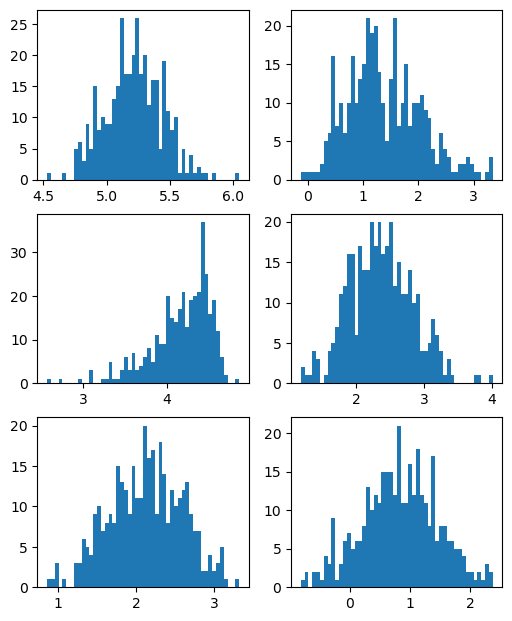

In [98]:
fig, axes = plt.subplots(3, 2, figsize=(6, 7.5)) 
polut = ['co_conc', 'no2_conc', 'o3_conc', 'pm10_conc', 'pm2p5_conc', 'so2_conc']

for i, ax in enumerate(axes.flat):
    ax.hist(np.log(ds.variables[polut[i]][:, 0, 0, 0 ]), bins=50)
plt.show()

In [ ]:
data = {
    "time": time, 
    "cords": 


    for i, lat in enumerate(ds.variables['lat'][:])
    for j, lon in enumerate(ds.variables['lon'][:])
}

In [95]:
axes.flat[1]

<Axes: >

In [74]:
for i in range(367):
    if np.log(ds.variables['co_conc'][i, 0, 0, 0]) > 6:
        print(time[i])


2023-11-08


netcdf

In [3]:
ds = nc.Dataset('data/3/adaptor.cams_regional_fc.retrieve-1711784804.7831938-5284-8-7a022bcb-9f4b-476b-ada5-450f77a5b403.nc')
ds_1 = nc.Dataset('data/3/temprature_wind/POWER_Point_Daily_20240301_20240328_050d4500N_030d3500E_LST.nc')

In [4]:
ds.variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 'o3_conc'])

In [5]:
ds_1.variables.keys()

dict_keys(['T2M', 'WS10M', 'time', 'lat', 'lon'])

In [6]:
ds["longitude"][:]

masked_array(data=[30.35, 30.45, 30.55, 30.65, 30.75],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [8]:
O3 = ds["o3_conc"][:, 0, 0, 0].data

In [9]:
wind = ds_1["WS10M"][:].data.T[0,0]

In [10]:

temp = ds_1["T2M"][:].data.T[0,0]

In [11]:
print(len(O3))
print(len(wind))
print(len(temp))

28
28
28


In [23]:
params = np.array([wind, temp]).T

In [24]:
model = LinearRegression().fit(params[:27], O3[:27])

In [16]:
model.coef_

array([0.5173282 , 0.47848004], dtype=float32)

In [14]:
model.intercept_

59.62824

In [18]:
model.coef_[0] * wind[-1] + model.coef_[1] * temp[-1] + model.intercept_

67.64603

In [21]:
model.predict([[wind[-1], temp[-1]]])

array([67.64603], dtype=float32)

In [26]:
prediction = np.array(model.predict(params))

In [22]:
O3[27]

79.495834

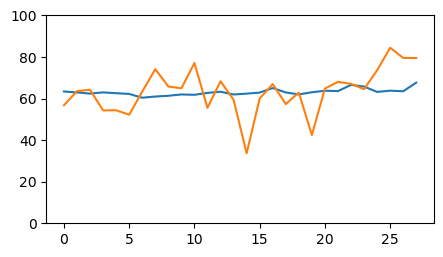

In [33]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(prediction)
ax.plot(O3)
ax.set_ylim([0, 100])
plt.show()

In [47]:
print("max difference = ", np.max(np.abs(prediction - O3)), "=", np.max(np.abs(prediction - O3)) / np.mean(np.abs(prediction - O3)), "% "
      "mean difference = " ,np.mean(np.abs(prediction - O3)), "=" , np.mean(np.abs(prediction - O3)) / np.mean(np.abs(prediction - O3)), "% ")

max difference =  28.688492 = 3.7122946 % mean difference =  7.7279673 = 1.0 % 


Kaggle

In [48]:
df = pd.read_csv('data/kaggle/onehr.data.xls')

In [18]:
df.columns = ["Date","WSR0","WSR1","WSR2","WSR3","WSR4","WSR5","WSR6","WSR7","WSR8","WSR9","WSR10","WSR11","WSR12","WSR13","WSR14","WSR15","WSR16","WSR17","WSR18","WSR19","WSR20","WSR21","WSR22","WSR23","WSR_PK","WSR_AV","T0","T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16","T17","T18","T19","T20","T21","T22","T23","T_PK","T_AV","T85","RH85","U85","V85","HT85","T70","RH70","U70","V70","HT70","T50","RH50","U50","V50","HT50","KI","TT","SLP","SLP_","Precp","Target"]

In [19]:
df

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Target
0,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
2,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
3,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
4,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,0.09,11.98,11.28,5770,27.95,46.25,10120,?,5.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2531,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2532,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2533,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [20]:
data = nc.Dataset('data/2/adaptor.cams_regional_fc.retrieve-1706511910.699155-19398-7-0139e086-561b-430a-ad16-805bf0c3497a.nc')

In [21]:
data.variables.keys()

dict_keys(['longitude', 'latitude', 'level', 'time', 'o3_conc'])

In [22]:
data['o3_conc']

<class 'netCDF4._netCDF4.Variable'>
float32 o3_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: Ozone
    units: µg/m3
    value: hourly values
    standard_name: mass_concentration_of_ozone_in_air
unlimited dimensions: time
current shape = (1, 10, 3, 3)
filling on

In [23]:
data['latitude']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [24]:
data['level']

<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (10,)
filling on, default _FillValue of 9.969209968386869e+36 used